In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
data0 = pd.read_csv('./data/训练数据.csv')
data0

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [4]:
data0 = data0.iloc[1949:][['date']]
data0

,date
1949,2022-08-10
1950,2022-08-11
1951,2022-08-12
1952,2022-08-15
1953,2022-08-16
...,...
2430,2024-08-05
2431,2024-08-06
2432,2024-08-07
2433,2024-08-08


In [5]:
data0.reset_index(drop = True,inplace = True)
data0

,date
0,2022-08-10
1,2022-08-11
2,2022-08-12
3,2022-08-15
4,2022-08-16
...,...
481,2024-08-05
482,2024-08-06
483,2024-08-07
484,2024-08-08


In [6]:
data = pd.read_csv('./data/LSTM+修正论坛情绪值-预测值.csv')

In [7]:
data

,truth,pred,pred.1,pred.2,pred.3,pred.4
0,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
1,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
3,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
4,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...
481,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
482,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
483,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064
484,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755


In [8]:
data['LSTM+IS+S'] = (data['pred'] + data['pred.1'] + data['pred.2'] +  data['pred.3'] + data['pred.4'])/5

In [9]:
data = pd.concat([data0, data], axis=1)
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
0,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047,5.963662
1,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671,5.966617
2,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695,5.961781
3,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737,5.964884
4,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124,5.975597
...,...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438,6.316644
482,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578,6.314491
483,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064,6.310638
484,2024-08-08,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755,6.307224


In [10]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [11]:
data.index = data.date
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
date,,,,,,,,
2022-08-10,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047,5.963662
2022-08-11,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671,5.966617
2022-08-12,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695,5.961781
2022-08-15,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737,5.964884
2022-08-16,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124,5.975597
...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438,6.316644
2024-08-06,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578,6.314491
2024-08-07,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064,6.310638


In [12]:
data['truth'] = np.exp(data['truth'])
data['LSTM+IS+S'] = np.exp(data['LSTM+IS+S'])

In [13]:
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
date,,,,,,,,
2022-08-10,2022-08-10,391.18,5.961126,5.968853,5.963826,5.963461,5.961047,389.032341
2022-08-11,2022-08-11,389.56,5.965225,5.970915,5.965611,5.967664,5.963671,390.183523
2022-08-12,2022-08-12,391.22,5.957880,5.968340,5.960678,5.961311,5.960695,388.301026
2022-08-15,2022-08-15,392.00,5.964905,5.969045,5.965706,5.964025,5.960737,389.507695
2022-08-16,2022-08-16,391.52,5.975966,5.978442,5.976543,5.971910,5.975124,393.703040
...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,559.94,6.314339,6.321615,6.317025,6.316805,6.313438,553.711814
2024-08-06,2024-08-06,554.18,6.312823,6.319193,6.314431,6.314431,6.311578,552.520833
2024-08-07,2024-08-07,556.06,6.309450,6.314950,6.310256,6.310470,6.308064,550.395890


In [14]:
data = data[['truth','LSTM+IS+S']]
data

,truth,LSTM+IS+S
date,,
2022-08-10,391.18,389.032341
2022-08-11,389.56,390.183523
2022-08-12,391.22,388.301026
2022-08-15,392.00,389.507695
2022-08-16,391.52,393.703040
...,...,...
2024-08-05,559.94,553.711814
2024-08-06,554.18,552.520833
2024-08-07,556.06,550.395890


In [15]:
data1 = pd.read_csv('./data/LSTM+传统因素-预测值.csv')
data1 = pd.concat([data0, data1], axis=1)
data1

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.711452,5.902018,5.915515,5.857261,5.736455
1,2022-08-11,5.965018,5.711507,5.903241,5.916546,5.858077,5.736661
2,2022-08-12,5.969270,5.711477,5.903160,5.916247,5.857862,5.736532
3,2022-08-15,5.971262,5.711525,5.903814,5.917234,5.858512,5.736800
4,2022-08-16,5.970037,5.711574,5.904735,5.917797,5.859072,5.736938
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,5.722423,6.148413,6.105676,6.036513,5.795465
482,2024-08-06,6.317490,5.722188,6.146954,6.104899,6.035306,5.794842
483,2024-08-07,6.320876,5.722003,6.143406,6.102236,6.032344,5.793659
484,2024-08-08,6.320948,5.721929,6.139945,6.099046,6.029394,5.792548


In [16]:
data1['first time'] = (data1['pred'] + data1['pred.1'] + data1['pred.2'] +  data1['pred.3'] + data1['pred.4'])/5
data1['first time'] = np.exp(data1['first time'])
data1['date'] = pd.to_datetime(data1['date'], format = '%Y-%m-%d')
data1.index = data1.date
data1 = data1[['first time']]
data1

,first time
date,
2022-08-10,338.505452
2022-08-11,338.731087
2022-08-12,338.680011
2022-08-15,338.856671
2022-08-16,339.007862
...,...
2024-08-05,388.268838
2024-08-06,387.934930
2024-08-07,387.118048


In [17]:
data = pd.concat([data, data1], axis=1)
data

,truth,LSTM+IS+S,first time
date,,,
2022-08-10,391.18,389.032341,338.505452
2022-08-11,389.56,390.183523,338.731087
2022-08-12,391.22,388.301026,338.680011
2022-08-15,392.00,389.507695,338.856671
2022-08-16,391.52,393.703040,339.007862
...,...,...,...
2024-08-05,559.94,553.711814,388.268838
2024-08-06,554.18,552.520833,387.934930
2024-08-07,556.06,550.395890,387.118048


In [18]:
data2 = pd.read_csv('./data/LSTM+传统因素-高相关-预测值.csv')
data2 = pd.concat([data0, data2], axis=1)
data2

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.940969,5.949997,5.940092,5.942806,5.933306
1,2022-08-11,5.965018,5.942976,5.952290,5.942580,5.945097,5.935384
2,2022-08-12,5.969270,5.943369,5.952523,5.942903,5.945397,5.935850
3,2022-08-15,5.971262,5.944508,5.954088,5.944701,5.947050,5.937479
4,2022-08-16,5.970037,5.946451,5.956144,5.946766,5.949110,5.939674
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.214560,6.234951,6.197990,6.209855,6.187946
482,2024-08-06,6.317490,6.210431,6.229770,6.192262,6.204402,6.182636
483,2024-08-07,6.320876,6.205896,6.225489,6.188440,6.200232,6.178197
484,2024-08-08,6.320948,6.201839,6.221522,6.184832,6.196373,6.174313


In [19]:
data2['second time'] = (data2['pred'] + data2['pred.1'] + data2['pred.2'] +  data2['pred.3'] + data2['pred.4'])/5
data2['second time'] = np.exp(data2['second time'])
data2['date'] = pd.to_datetime(data2['date'], format = '%Y-%m-%d')
data2.index = data2.date
data2 = data2[['second time']]
data2

,second time
date,
2022-08-10,380.480139
2022-08-11,381.329999
2022-08-12,381.460963
2022-08-15,382.055161
2022-08-16,382.844568
...,...
2024-08-05,497.233741
2024-08-06,494.674584
2024-08-07,492.577072


In [20]:
data = pd.concat([data, data2], axis=1)
data

,truth,LSTM+IS+S,first time,second time
date,,,,
2022-08-10,391.18,389.032341,338.505452,380.480139
2022-08-11,389.56,390.183523,338.731087,381.329999
2022-08-12,391.22,388.301026,338.680011,381.460963
2022-08-15,392.00,389.507695,338.856671,382.055161
2022-08-16,391.52,393.703040,339.007862,382.844568
...,...,...,...,...
2024-08-05,559.94,553.711814,388.268838,497.233741
2024-08-06,554.18,552.520833,387.934930,494.674584
2024-08-07,556.06,550.395890,387.118048,492.577072


In [21]:
data3 = pd.read_csv('./data/LSTM+传统因素-高高相关-预测值.csv')
data3 = pd.concat([data0, data3], axis=1)
data3

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.954761,5.952764,5.955027,5.950303,5.955094
1,2022-08-11,5.965018,5.957560,5.955686,5.957917,5.953113,5.958097
2,2022-08-12,5.969270,5.958098,5.956315,5.958324,5.953926,5.958569
3,2022-08-15,5.971262,5.959943,5.958592,5.960368,5.956107,5.960366
4,2022-08-16,5.970037,5.962170,5.961129,5.962615,5.958695,5.962452
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.249957,6.245985,6.255280,6.229256,6.267384
482,2024-08-06,6.317490,6.244790,6.239835,6.249421,6.223684,6.262196
483,2024-08-07,6.320876,6.240884,6.235213,6.245313,6.219258,6.258810
484,2024-08-08,6.320948,6.236832,6.230759,6.241461,6.214763,6.255299


In [22]:
data3['third time'] = (data3['pred'] + data3['pred.1'] + data3['pred.2'] +  data3['pred.3'] + data3['pred.4'])/5
data3['third time'] = np.exp(data3['third time'])
data3['date'] = pd.to_datetime(data3['date'], format = '%Y-%m-%d')
data3.index = data3.date
data3 = data3[['third time']]
data3

,third time
date,
2022-08-10,385.133351
2022-08-11,386.246057
2022-08-12,386.466968
2022-08-15,387.251836
2022-08-16,388.157824
...,...
2024-08-05,517.791308
2024-08-06,514.906371
2024-08-07,512.804961


In [23]:
data = pd.concat([data, data3], axis=1)
data

,truth,LSTM+IS+S,first time,second time,third time
date,,,,,
2022-08-10,391.18,389.032341,338.505452,380.480139,385.133351
2022-08-11,389.56,390.183523,338.731087,381.329999,386.246057
2022-08-12,391.22,388.301026,338.680011,381.460963,386.466968
2022-08-15,392.00,389.507695,338.856671,382.055161,387.251836
2022-08-16,391.52,393.703040,339.007862,382.844568,388.157824
...,...,...,...,...,...
2024-08-05,559.94,553.711814,388.268838,497.233741,517.791308
2024-08-06,554.18,552.520833,387.934930,494.674584,514.906371
2024-08-07,556.06,550.395890,387.118048,492.577072,512.804961


In [24]:
data4 = pd.read_csv('./data/LSTM+传统因素-高高高相关-预测值.csv')
data4 = pd.concat([data0, data4], axis=1)
data4

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.963700,5.963660,5.962963,5.957696,5.962962
1,2022-08-11,5.965018,5.966364,5.966146,5.965814,5.960260,5.965648
2,2022-08-12,5.969270,5.966929,5.966778,5.966343,5.960782,5.966117
3,2022-08-15,5.971262,5.968585,5.968510,5.968228,5.962672,5.967993
4,2022-08-16,5.970037,5.970781,5.970834,5.970457,5.964993,5.970242
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.283663,6.281381,6.279760,6.271996,6.283414
482,2024-08-06,6.317490,6.278842,6.276490,6.274409,6.266632,6.277993
483,2024-08-07,6.320876,6.275085,6.271955,6.270600,6.261934,6.273477
484,2024-08-08,6.320948,6.271323,6.267738,6.266841,6.257682,6.269322


In [25]:
data4['fourth time'] = (data4['pred'] + data4['pred.1'] + data4['pred.2'] +  data4['pred.3'] + data4['pred.4'])/5
data4['fourth time'] = np.exp(data4['fourth time'])
data4['date'] = pd.to_datetime(data4['date'], format = '%Y-%m-%d')
data4.index = data4.date
data4 = data4[['fourth time']]
data4

,fourth time
date,
2022-08-10,388.462329
2022-08-11,389.493143
2022-08-12,389.705030
2022-08-15,390.410020
2022-08-16,391.294816
...,...
2024-08-05,533.811478
2024-08-06,531.058975
2024-08-07,528.799900


In [26]:
data = pd.concat([data, data4], axis=1)
data

,truth,LSTM+IS+S,first time,second time,third time,fourth time
date,,,,,,
2022-08-10,391.18,389.032341,338.505452,380.480139,385.133351,388.462329
2022-08-11,389.56,390.183523,338.731087,381.329999,386.246057,389.493143
2022-08-12,391.22,388.301026,338.680011,381.460963,386.466968,389.705030
2022-08-15,392.00,389.507695,338.856671,382.055161,387.251836,390.410020
2022-08-16,391.52,393.703040,339.007862,382.844568,388.157824,391.294816
...,...,...,...,...,...,...
2024-08-05,559.94,553.711814,388.268838,497.233741,517.791308,533.811478
2024-08-06,554.18,552.520833,387.934930,494.674584,514.906371,531.058975
2024-08-07,556.06,550.395890,387.118048,492.577072,512.804961,528.799900


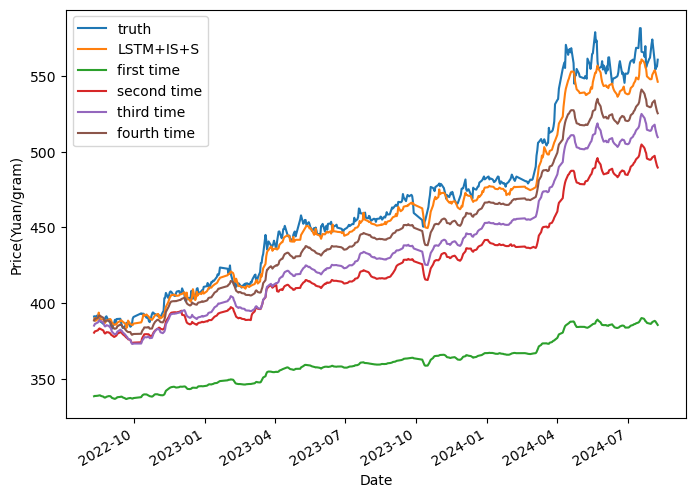

In [27]:
ax = data.plot(figsize = (8,6))
ax.set_ylabel('Price(Yuan/gram)')
ax.set_xlabel('Date')
plt.show()